Name: Aryan Jha

Program: MBA TECH AI

Cousre: Machine Learning

Topic: Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Upload data set into the dataframe
df= pd.read_csv("adultPrac7.csv")

In [ ]:
#Check the shape of the data set.
df.size
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.dropna()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#Find out all the categorical columns from the data set
df.columns.astype("object")

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
#Check if null values exist in all the categorical columns
df.columns.astype("object").isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
df= df.replace([" ?", "??"], "NAN")

In [ ]:
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
#Explore numeric columns and check any null values exist for the numeric columns.
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
#Create a feature vector with x= all the columns except income and y=income

x= df.drop(["income"],axis=1)
y= df["income"]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import  train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x.columns.astype("object").isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['workclass']=le.fit_transform(df["workclass"])
df['education']=le.fit_transform(df["education"])
df['marital_status']=le.fit_transform(df["marital_status"])
df['occupation']=le.fit_transform(df["occupation"])
df['relationship']=le.fit_transform(df["relationship"])
df['race']=le.fit_transform(df["race"])
df['sex']=le.fit_transform(df["sex"])
df['native_country']=le.fit_transform(df["native_country"])

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,<=50K
6,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,<=50K
7,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,>50K
8,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,>50K
9,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,>50K


KNN USING SKLEARN WITH K=5

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X= df.drop(["income"], axis=1)
Y= df["income"].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
neighbors= KNeighborsClassifier(n_neighbors=5)

In [ ]:
neighbors.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
predicted= neighbors.predict(X_test)

In [ ]:
#Confusion Matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)





array([[6864,  591],
       [1567,  747]])

In [ ]:
#Classification Report:
from sklearn.metrics import classification_report
target_names= ["Class 0", "Class 1"]
print(classification_report(y_test, predicted, target_names= target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.92      0.86      7455
     Class 1       0.56      0.32      0.41      2314

    accuracy                           0.78      9769
   macro avg       0.69      0.62      0.64      9769
weighted avg       0.75      0.78      0.76      9769



Naive Bayes on the given data set


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv("adultPrac7.csv")

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['workclass']=le.fit_transform(df["workclass"])
df['education']=le.fit_transform(df["education"])
df['marital_status']=le.fit_transform(df["marital_status"])
df['occupation']=le.fit_transform(df["occupation"])
df['relationship']=le.fit_transform(df["relationship"])
df['race']=le.fit_transform(df["race"])
df['sex']=le.fit_transform(df["sex"])
df['native_country']=le.fit_transform(df["native_country"])

In [ ]:
#X= df.drop(["income"])
Y=df["income"].values.reshape(-1,1)
X=df.drop(["income"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
#GaussianNB object and fit it to the training data:
# Create a Naive Bayes classifier
gnb = GaussianNB()

# Fit the classifier to the training data
gnb.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
# Predict the classes of the testing data
y_pred = gnb.predict(X_test)


In [ ]:
# Calculate the accuracy of the classifier
accuracy = gnb.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7989558808475791


 Compare accuracy score of both the classifier.

Accuracy of KNN Classifier is 0.780 --> 78%

Accuracy of Naive Bayes Classifier is 0.798 --> 79.8%

They are almost equal but accuracy of KNN is slightly less than naive bayes

ROC curve for both models

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


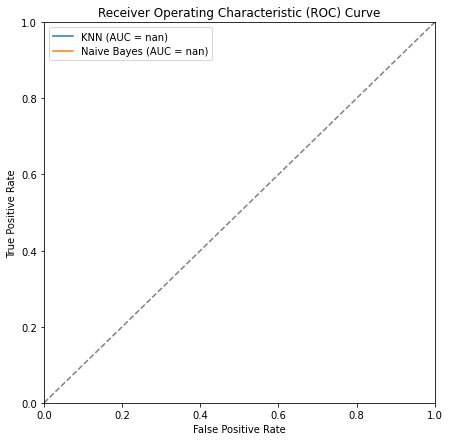

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Create a Naive Bayes classifier
gnb = GaussianNB()

# Fit the classifier to the training data
gnb.fit(X_train, y_train)

# Predict the probabilities of the testing data
y_knn_prob = knn.predict_proba(X_test)
y_gnb_prob = gnb.predict_proba(X_test)

# Compute the ROC curve and AUC for each classifier
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_knn_prob[:,1], pos_label=1)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_gnb_prob[:,1], pos_label=1)
auc_knn = auc(fpr_knn, tpr_knn)
auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot the ROC curves
plt.figure(figsize=(7,7))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % auc_knn)
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (AUC = %0.2f)' % auc_gnb)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()